## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
# set header to 0 and use the names param to use our own column names
df = pd.read_csv('query_results.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2519,2023-09-01 00:00:00,php,2099
2520,2023-09-01 00:00:00,python,10306
2521,2023-09-01 00:00:00,r,2197
2522,2023-09-01 00:00:00,ruby,214
2523,2023-09-01 00:00:00,swift,998


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2524
TAG      2524
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43347
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,399693
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1603091
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,799745
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51287
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,70975
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1907383
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2513065
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67868


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'][1]
df.DATE[1]
# either one works

'2008-08-01 00:00:00'

In [10]:
print(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


In [11]:
print(type(pd.to_datetime(df.DATE[1])))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
# now convert entire DATE column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
df.shape

(2524, 3)

In [14]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [15]:
df.tail()

,DATE,TAG,POSTS
2519,2023-09-01,php,2099
2520,2023-09-01,python,10306
2521,2023-09-01,r,2197
2522,2023-09-01,ruby,214
2523,2023-09-01,swift,998


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'], 'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'], 'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [17]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [19]:
# pivot to df dataframe so that each row is a date and each column is a language
# store the result in a variable called reshaped_df
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [20]:
reshaped_df.shape

(183, 14)

In [21]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [22]:
# the 'NaN' values in 'reshaped_df' can be converted to 0's
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1640.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,174.0,1049.0,3835.0,1782.0,114.0,417.0,4183.0,7775.0,54.0,1971.0,11802.0,2866.0,255.0,998.0
2023-06-01,155.0,889.0,3815.0,1815.0,117.0,521.0,4295.0,7540.0,54.0,1906.0,11290.0,2667.0,226.0,1133.0
2023-07-01,163.0,919.0,3882.0,1858.0,99.0,526.0,4083.0,7559.0,69.0,1754.0,11191.0,2364.0,224.0,1158.0


In [23]:
# check if there are any more NaN values anywhere else in the DataFrame
reshaped_df.isna().values.any()

False

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

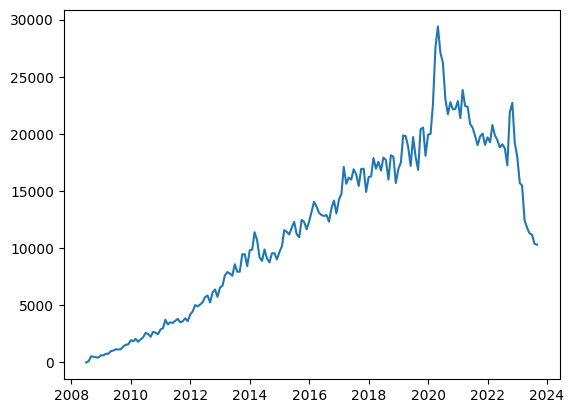

In [24]:
plt.plot(reshaped_df.index, reshaped_df['python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

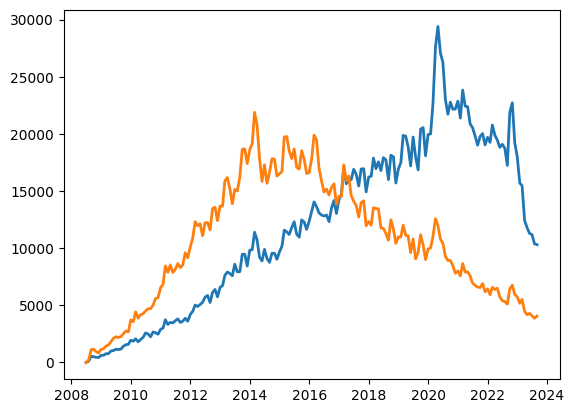

In [25]:
plt.plot(reshaped_df.index, reshaped_df['python'], linewidth=2, markersize=10)
plt.plot(reshaped_df.index, reshaped_df['java'], linewidth=2, markersize=10)

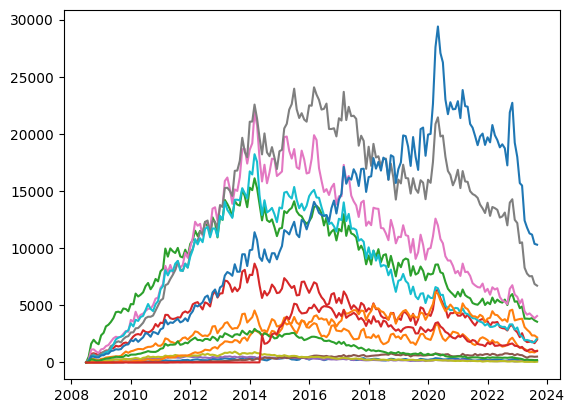

In [27]:
# we can also use a for loop to plot every language
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column])

In [ ]:
# to style the chart, we can use various methods:
# .figure() -> allows us to resize the chart
# .xticks() -> configures our x-axis
# .yticks() -> configures our y-axis
# .xlabel() -> add text to the x-axis
# .ylabel() -> add text to the y-axis
# .ylim()   -> allows us to set a lower and upper bound

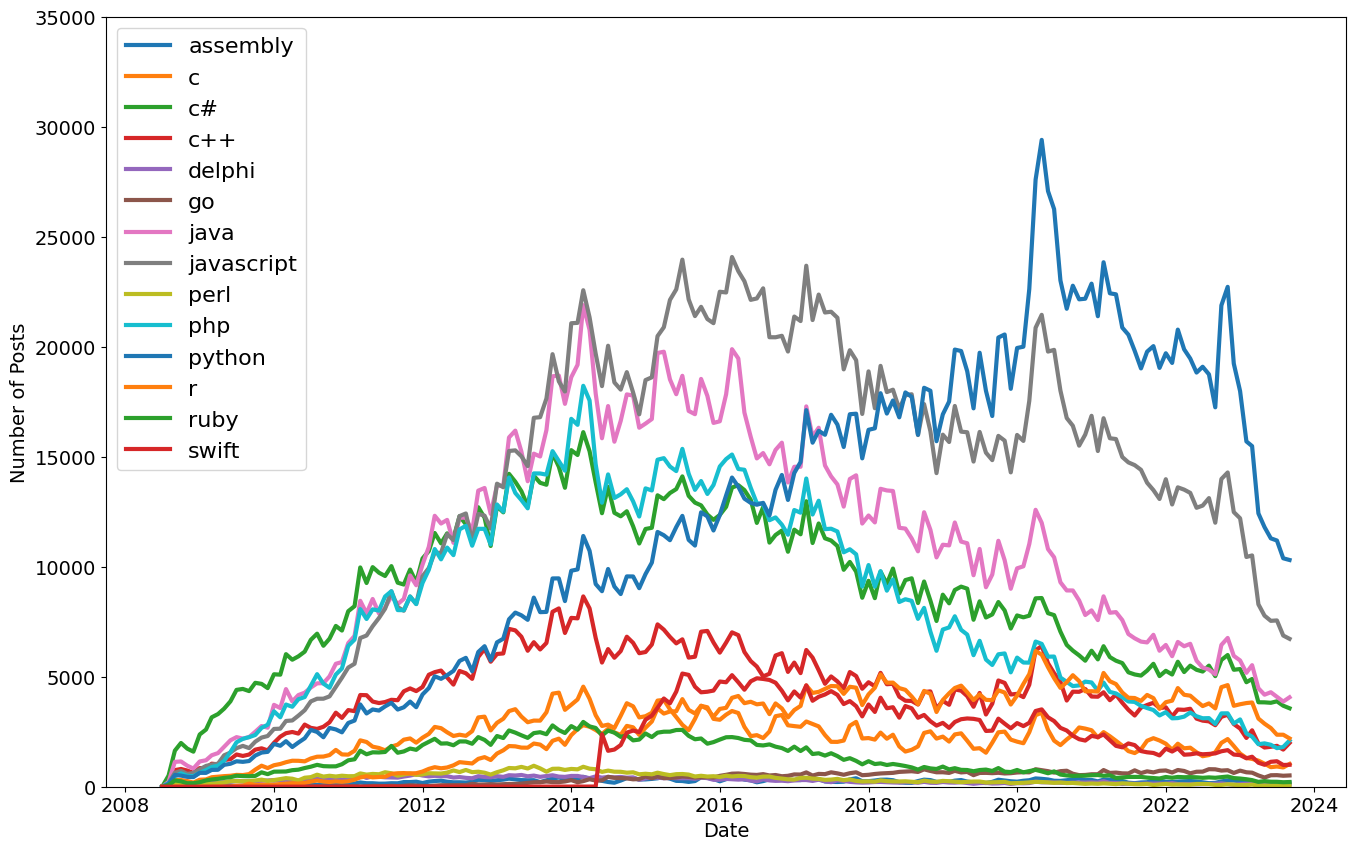

In [29]:
# let's style the previous chart and make it more legible
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

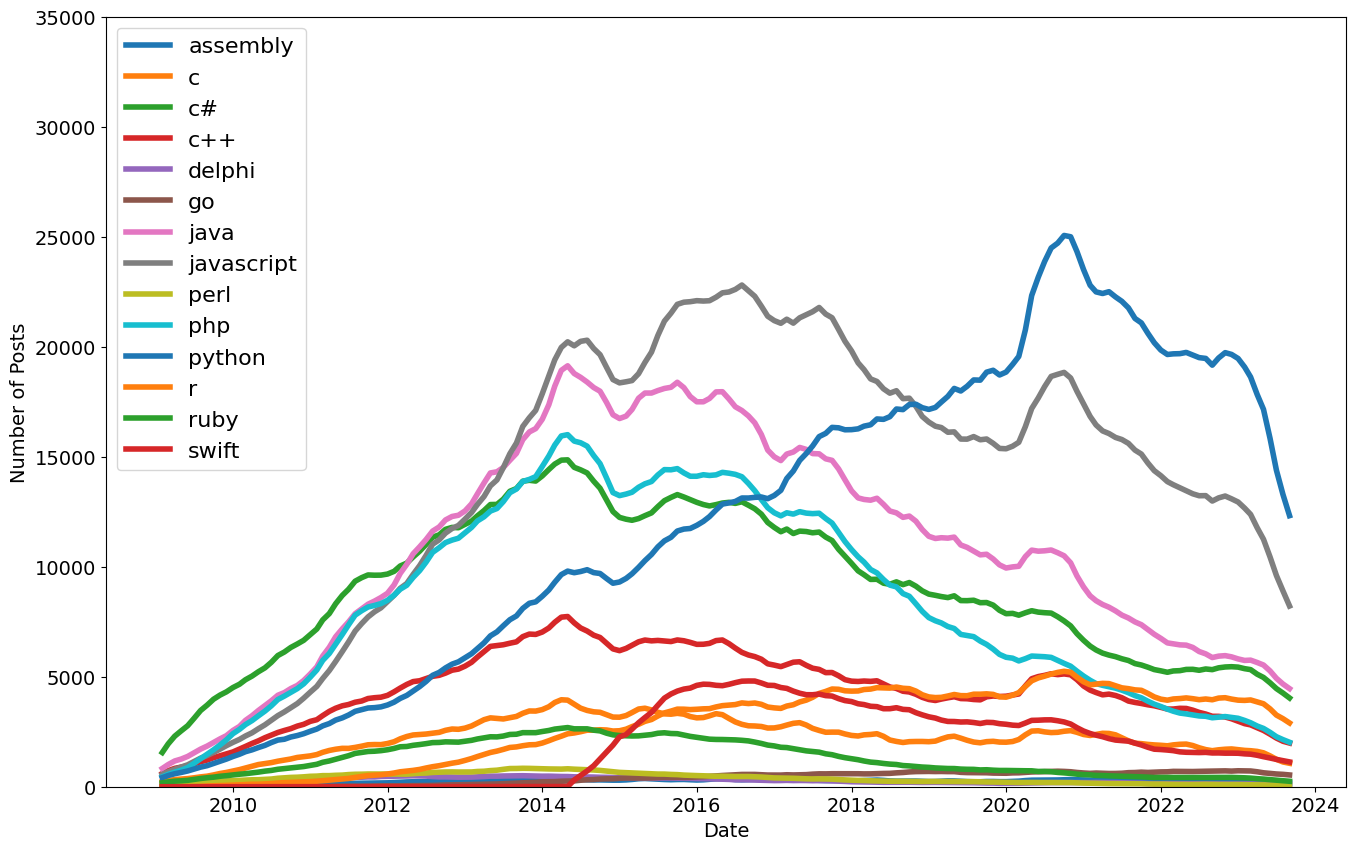

In [34]:
# the window is the number of observations that are avg'd
roll_df = reshaped_df.rolling(window=8).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=4, label=roll_df[column].name)

plt.legend(fontsize=16)